In [6]:
import mne 
import numpy as np
from scipy.spatial.distance import cdist

def getChannelMapping():
    egi_montage = mne.channels.make_standard_montage('GSN-HydroCel-128')
    std1020_montage = mne.channels.make_standard_montage('standard_1020')

    # Get channel positions
    egi_pos = egi_montage.get_positions()['ch_pos']
    std_pos = std1020_montage.get_positions()['ch_pos']

    # Convert to arrays and label lists
    egi_labels, egi_xyz = zip(
        *[(k, v) for k, v in egi_pos.items() if k.startswith('E')])
    std_labels, std_xyz = zip(*std_pos.items())

    # Compute distance matrix
    distances = cdist(np.array(egi_xyz), np.array(std_xyz))

    # Find closest 10-20 match for each EGI channel
    egiTostandard = {}
    for i, label in enumerate(egi_labels):
        closest_idx = np.argmin(distances[i])
        closest_label = std_labels[closest_idx]
        egiTostandard[label] = closest_label

    return egiTostandard

Extracting parameters from /Users/cccohen/deepEEG/DataExploration/1_191_11173897_3_20220808_125832002_processed.set...
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.


/var/folders/xx/mmyr9_kx7js9mtx2ptls0vyh0000gn/T/ipykernel_10351/4281023672.py:22: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.io.read_epochs_eeglab(full_file_path)


Setting up band-pass filter from 0.1 - 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 33001 samples (33.001 s)



/var/folders/xx/mmyr9_kx7js9mtx2ptls0vyh0000gn/T/ipykernel_10351/4281023672.py:60: RuntimeWarning: filter_length (33001) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  data.filter(l_freq=0.1, h_freq=75.0)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 3589 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 4914 out of 4914 | elapsed:    0.2s finished
/var/folders/xx/mmyr9_kx7js9mtx2ptls0vyh0000gn/T/ipykernel_10351/4281023672.py:65: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The channels missing from the montage are:

['FPZ', 'POZ', 'OZ', 'FZ', 'CZ', 'PZ', 'FCZ', 'FP2'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the cha

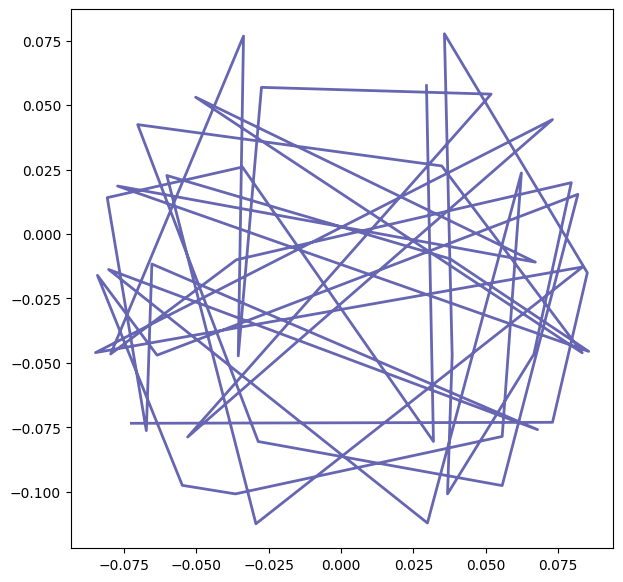

In [43]:
egiStandardDict = getChannelMapping() 
checkpointChannels = set(['FP1', 'FPZ', 'FP2',
                          'AF3', 'AF4',
                          'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8',
                          'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8',
                          'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8',
                          'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8',
                          'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8',
                          'PO7', 'PO3', 'POZ',  'PO4', 'PO8',
                          'O1', 'OZ', 'O2', ])
drop_channels = ['PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EMG-REF', 'EEG C3P-REF', 'EEG C4P-REF', 'EEG SP1-REF', 'EEG SP2-REF',
                 'EEG LUC-REF', 'EEG RLC-REF', 'EEG RESP1-REF', 'EEG RESP2-REF', 'EEG EKG-REF', 'RESP ABDOMEN-REF', 'ECG EKG-REF', 'PULSE RATE', 'EEG PG2-REF', 'EEG PG1-REF']
drop_channels.extend([f'EEG {i}-REF' for i in range(20, 129)])
#######

chOrder_standard =  ['FPZ', 'POZ', 'P7', 'OZ', 'P8', 'T8', 'AF4', 'CP2', 'PO4', 'CP4', 'FC6', 'C1', 'CP5', 'AF3', 'CP1', 'FZ', 'F1', 'CZ', 'PZ', 'F4', 'P3', 'F8', 'TP7', 'C6', 'O1', 'FC3',
                'C2', 'TP8', 'FC5', 'FCZ', 'C4', 'F3', 'FP2', 'CP6', 'FC2', 'F7', 'P1', 'PO8', 'FT8', 'CP3', 'T7', 'PO7', 'PO3', 'P4', 'FC4', 'O2', 'C5', 'P6', 'C3', 'P5', 'FT7', 'FC1', 'P2', 'F2']

#######

full_file_path = "/Users/cccohen/deepEEG/DataExploration/1_191_11173897_3_20220808_125832002_processed.set"
data = mne.io.read_epochs_eeglab(full_file_path)

# filter dictionary
available_chs = data.info['ch_names']
filtered_mapping = {k.upper(): v.upper() for k,
                        v in egiStandardDict.items() if k in available_chs}

used_targets = set()
unique_mapping = {}
for k, v in filtered_mapping.items():
        if v not in used_targets:
            unique_mapping[k] = v
            used_targets.add(v)

data.rename_channels(unique_mapping)
data.pick(list(unique_mapping.values()))

data_channels = set(data.info['ch_names'])
missing_channels = data_channels - checkpointChannels
    
    
allowed_channels = data_channels - missing_channels
data.pick(list(allowed_channels))
data_channels = data.info['ch_names']

   
if drop_channels is not None:
            useless_chs = []
            for ch in drop_channels:
                if ch in data.ch_names:
                    useless_chs.append(ch)
            data.drop_channels(useless_chs)

data.reorder_channels(chOrder_standard)
data_channels = data.info['ch_names']
if data_channels != chOrder_standard:
    raise Exception(f"channel order is wrong!\Got:{data_channels}\nexpected: {chOrder_standard}")

data.filter(l_freq=0.1, h_freq=75.0)
data.resample(256, n_jobs=5)

# If your data has a known montage (e.g., standard_1020), set it:
montage = mne.channels.make_standard_montage('standard_1020')
data.set_montage(montage, on_missing='warn')

# # Plot the scalp layout
# data.plot_sensors(kind='topomap', show_names=True)

positions_dict = montage.get_positions()['ch_pos']
positions_2d = np.array([positions_dict[ch][:2] for ch in chOrder_standard if ch in positions_dict])

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(positions_2d[:, 0], positions_2d[:, 1], '-', color='navy', linewidth=2, alpha=0.6)
# Draw an arrow at the end
arrow_start = positions_2d[0]
arrow_end = positions_2d[-1]



In [ ]:
montage = mne.channels.make_standard_montage("standard_1005")
data.set_montage(montage, on_missing='warn')
rename_map = {
    'FPZ': 'Fpz', 'OZ': 'Oz', 'POZ': 'Poz', 'FP2': 'Fp2',
    'FZ': 'Fz', 'PZ': 'Pz', 'CZ': 'Cz', 'FCZ': 'Fcz'
}

data.rename_channels(rename_map)


/var/folders/xx/mmyr9_kx7js9mtx2ptls0vyh0000gn/T/ipykernel_10351/3946775111.py:2: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The channels missing from the montage are:

['OZ', 'POZ', 'FPZ', 'FZ', 'FP2', 'PZ', 'CZ', 'FCZ'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  info.set_montage(montage, on_missing='warn')


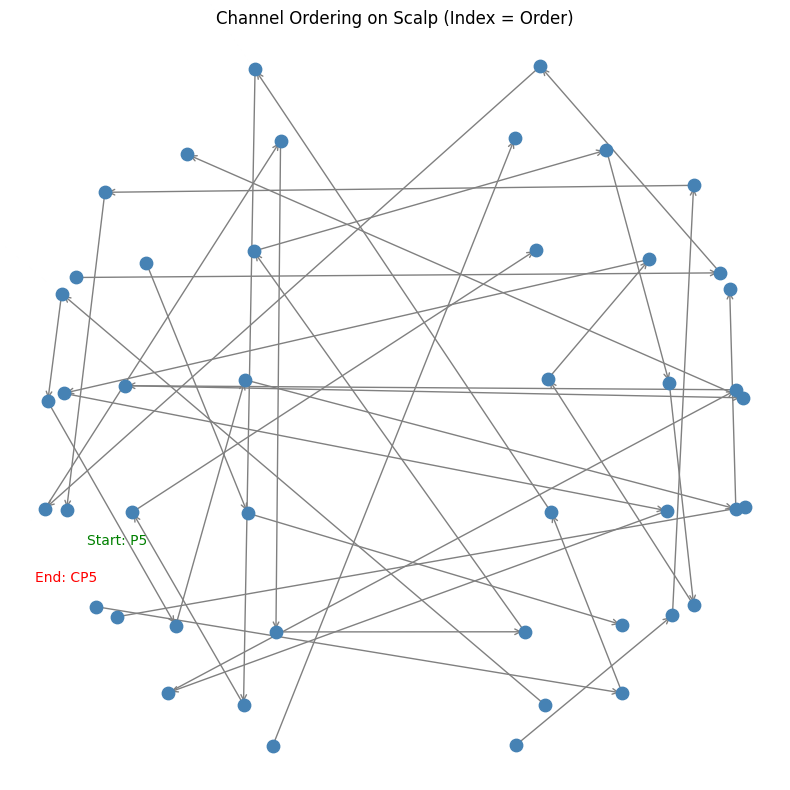

In [24]:
info = mne.create_info(ch_names=chOrder_standard, sfreq=1000.0, ch_types='eeg')
info.set_montage(montage, on_missing='warn')

pos_dict = montage.get_positions()['ch_pos']
xy = np.array([pos_dict[ch][:2] if ch in pos_dict else [np.nan, np.nan] for ch in chOrder_standard])

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Channel Ordering on Scalp (Index = Order)")
ax.axis('off')
# Plot electrodes
ax.scatter(xy[:, 0], xy[:, 1], s=80, color='steelblue', zorder=2)

# Annotate 1st and last channels for clarity
ax.text(xy[0, 0], xy[0, 1] + 0.02, f"Start: {chOrder_standard[0]}", fontsize=10, color='green', ha='center')
ax.text(xy[-1, 0], xy[-1, 1] - 0.02, f"End: {chOrder_standard[-1]}", fontsize=10, color='red', ha='center')

# Draw arrows between successive points
for i in range(len(xy) - 1):
    x0, y0 = xy[i]
    x1, y1 = xy[i + 1]
    if not (np.isnan(x0) or np.isnan(x1)):
        ax.annotate('', xy=(x1, y1), xytext=(x0, y0),
                    arrowprops=dict(arrowstyle='->', lw=1, color='gray'), zorder=1)

plt.tight_layout()
plt.show()

Extracting parameters from /Users/cccohen/deepEEG/DataExploration/1_191_11173897_3_20220808_125832002_processed.set...
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.


/var/folders/xx/mmyr9_kx7js9mtx2ptls0vyh0000gn/T/ipykernel_10351/1423908385.py:4: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  raw = mne.io.read_epochs_eeglab(full_file_path)


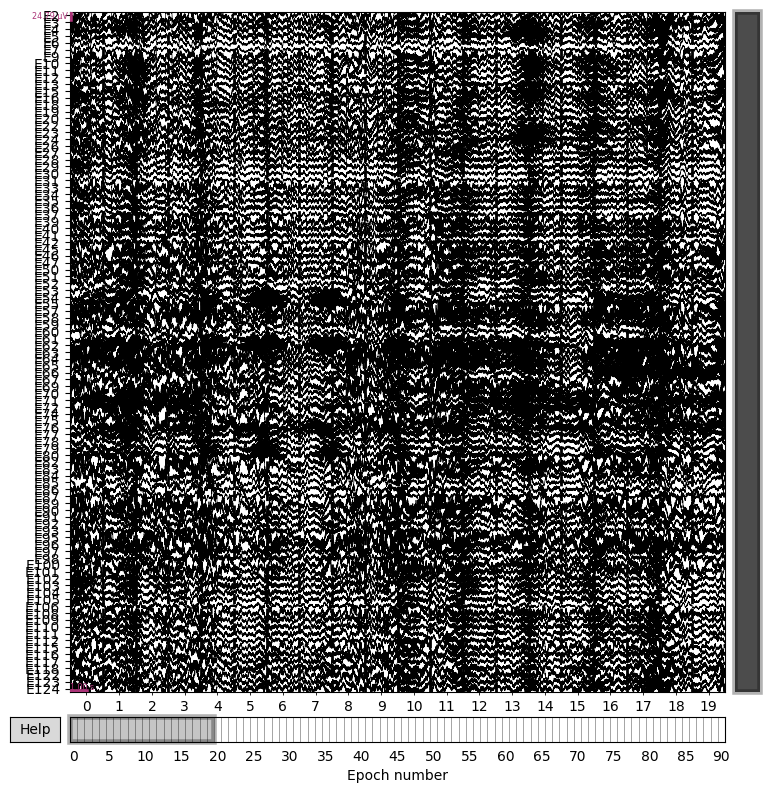

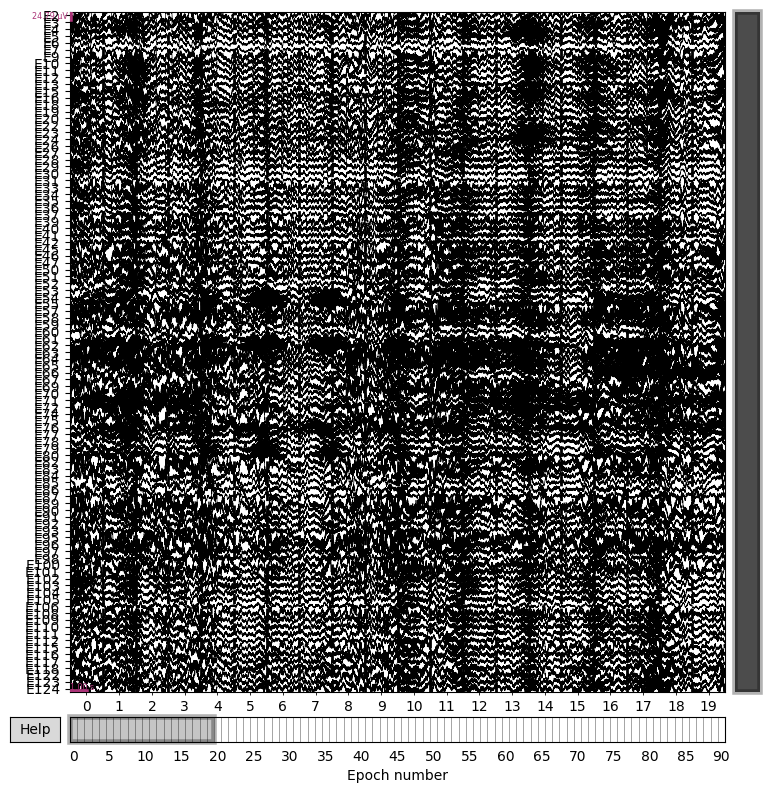